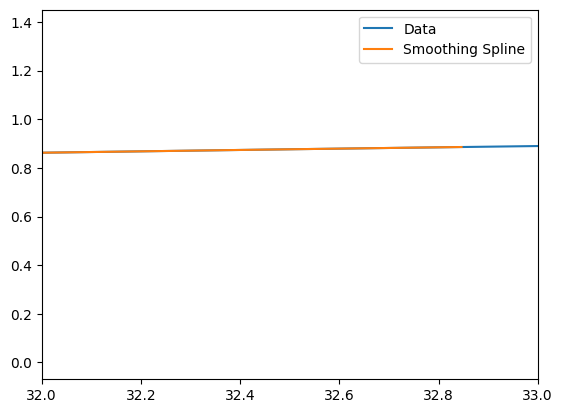

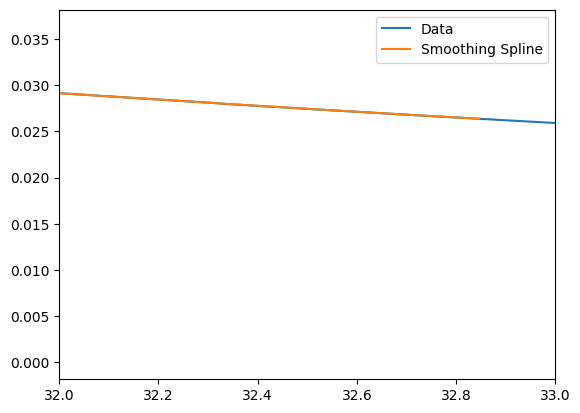

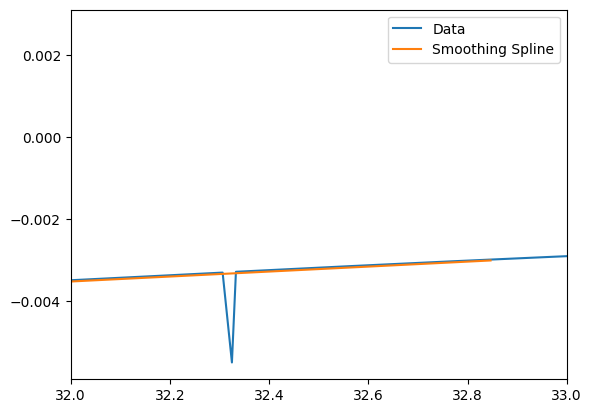

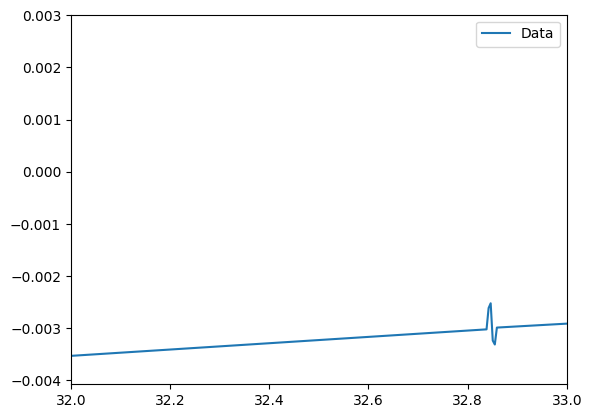

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, make_lsq_spline, BSpline, CubicSpline

file = open('Phi.dat', 'r')

start_gap = 40
end_gap = 100

data = np.loadtxt(file, dtype=np.float128)

radii = data[:, 0]
phi_vals = data[:, 1]

r_max = 120

d_start = d_end = -1

dp_dr = np.gradient(phi_vals, radii)
d2_phi = np.gradient(dp_dr, radii)

#find discontinuity (only looks for 1 for now)
for j in range (3, np.size(phi_vals) - 4):
    if ( abs(d2_phi[j] - d2_phi[j-1]) > 5 * abs(d2_phi[j - 1] - d2_phi[j - 2])):
        d_start = j - start_gap
        d_end = j + end_gap
        break

knots = []
num_knots = 1000
num_points = np.size(phi_vals) - 1

lower_buffer = 15
upper_buffer = 30

range_lower = range(d_start - lower_buffer, d_start)
range_upper = range(d_end, d_end + upper_buffer)

#add evenly indexed knots in [0, r_max], ensuring we skip trouble points
for n in range(0, num_knots + 1):
    if ( round (n * (num_points - 1) / num_knots)) < d_start - 1 or (round (n * (num_points - 1) / num_knots) > d_end):
        knots.append(radii[round (n * (num_points) / num_knots)])

#print(knots)
#print(radii)

degree = 3
#tck = make_lsq_spline(radii[500:1000], phi_vals[500:1000], knots, k=degree)

# : (
#l_spline = tck(radii)
#l_spline_derivative = tck.derivative(n=1)(radii)
#l_spline_second_derivative = tck.derivative(n=2)(radii)

interp_range = np.concatenate((list(range_lower), list(range_upper)))

spline_range = range(range_lower[0], range_upper[-1])


spline = UnivariateSpline(radii[interp_range], phi_vals[interp_range])
spline.set_smoothing_factor(0.5)
phi_smooth = spline(radii[spline_range])




#print(radii[interp_range])

spline_derivative = spline.derivative(n=1)(radii[spline_range])
spline_second_derivative = spline.derivative(n=2)(radii[spline_range])


plt.plot(radii, phi_vals, label='Data')
plt.plot(radii[spline_range], phi_smooth, '-', label='Smoothing Spline')
plt.xlim(32,33)
plt.legend()
plt.show()

plt.plot(radii, dp_dr, label='Data')
plt.plot(radii[spline_range], spline_derivative, '-', label='Smoothing Spline')
plt.xlim(32, 33)
plt.legend()
plt.show()

plt.plot(radii, d2_phi, label='Data')
plt.plot(radii[spline_range], spline_second_derivative, '-', label='Smoothing Spline')
plt.xlim(32, 33)
plt.legend()
plt.show()

smoothed_phi = []
for j in range(0, num_points + 1):
    if ( j < range_lower[0] or j > range_upper[-2]):
        smoothed_phi.append(phi_vals[j])
    else:
        smoothed_phi.append(phi_smooth[j - spline_range[0]])

dsp_dr = np.gradient(smoothed_phi, radii)
d2_sphi = np.gradient(dsp_dr, radii)

plt.plot(radii, d2_sphi, label='Data')
plt.xlim(32,33)
plt.legend()
plt.show()


#print(lines)
#for l in lines:
    #radii.append(float(l.split(' ')[0]))
   # phi_vals.append(float(l.split(' ')[1]))


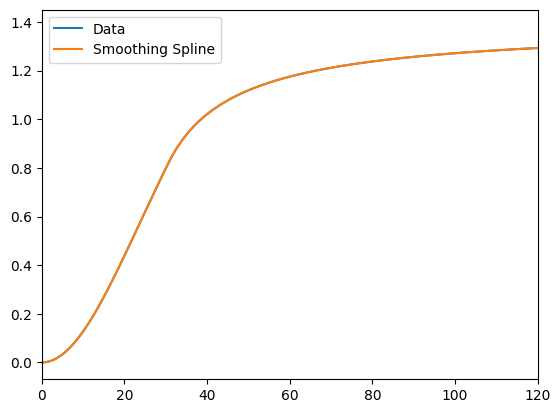

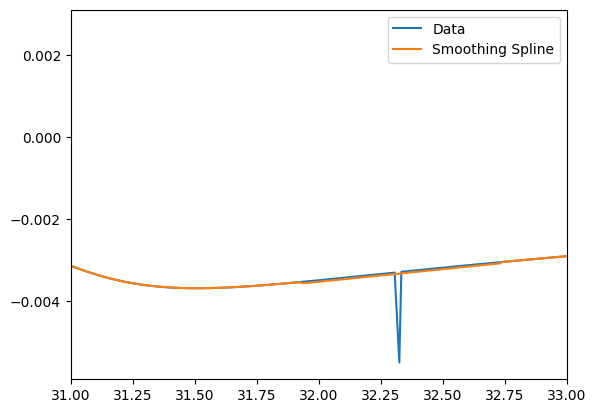

In [179]:
cubic_range = []

for j in range(0, num_points + 1):
    if (j < d_start or j > d_end):
        cubic_range.append(j)
    


c_spline = CubicSpline (radii[cubic_range], phi_vals[cubic_range])
phi_cubic = c_spline(radii)

dpc_dr = np.gradient(phi_cubic, radii)
d2pc_dr = np.gradient(dpc_dr, radii)

plt.plot(radii, phi_vals, label='Data')
plt.plot(radii, phi_cubic, '-', label='Smoothing Spline')
plt.xlim(0,120)
plt.legend()
plt.show()

plt.plot(radii, d2_phi, label='Data')
plt.plot(radii, d2pc_dr, '-', label='Smoothing Spline')
plt.xlim(31,33)
plt.legend()
plt.show()

smoothed_phi = []
for j in range(0, num_points + 1):
    smoothed_phi.append(phi_cubic[j])
    
smoothed_data = np.column_stack((radii, smoothed_phi))
np.savetxt("Phi.dat", smoothed_data, delimiter='\t', comments='')
